### plots pre-computed umap of acid-amine reaction fingerprints. Uses pre-computed data for consistency with manuscript Figure 5.

In [6]:
# from faerun import Faerun

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem

### load relevant data

In [7]:
molprops = pd.read_csv("../data_files/smiles_min_dist_natoms.csv")

In [9]:
umap_stats = np.load("./umap_acid_amine_33_nn_10.npy")
molprops["x"] = umap_stats[:,0]
molprops["y"] = umap_stats[:,1]

In [10]:
molprops

,Unnamed: 0,smiles,min_dist_all,natoms,x,y
0,0,COON,7.0,4,9.808563,2.349320
1,1,CONO,7.0,4,10.483125,1.580872
2,2,CON=O,8.0,4,10.119679,0.920053
3,3,NOCO,5.0,4,10.441175,1.984280
4,4,C1ONO1,6.0,4,7.987031,7.383158
...,...,...,...,...,...,...
57225,57225,ON1CC23C4=C2C43O1,10.0,8,0.186213,0.380461
57226,57226,O=NCC12C3=C1C32O,10.0,8,1.516293,0.338489
57227,57227,C1NC23C4=C2C143,10.0,6,2.949630,-0.289916
57228,57228,ON1CC23C4=C2C413,11.0,7,0.425296,0.667914


In [11]:
otherprops = pd.read_csv("../data_files/smiles_min_dist_dbank.csv",index_col=0)
otherprops.head()

,smiles,min_dist_all,natoms,drugbank_matches
0,COON,7.0,4,0
1,CONO,7.0,4,2
2,CON=O,8.0,4,2
3,NOCO,5.0,4,0
4,C1ONO1,6.0,4,0


In [12]:
match_dict = {}
for r in otherprops.itertuples():
    match_dict[r.smiles] =  r.drugbank_matches

In [13]:
molprops = molprops[molprops.smiles.isin(otherprops.smiles)].copy()

In [14]:
molprops["matches"] = [match_dict[s] for s in molprops.smiles]

molprops["matches_capped"] = np.minimum(np.array(molprops.matches),100)

molprops.sort_values("matches_capped",inplace=True,ascending=True)

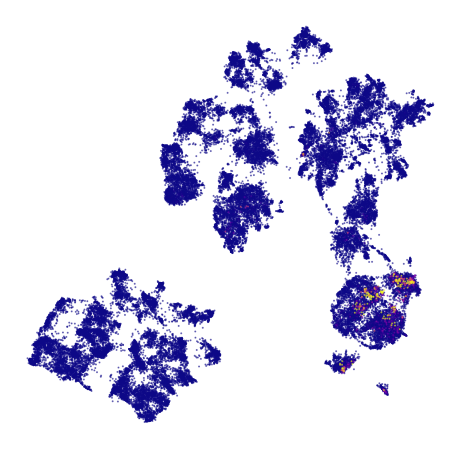

In [16]:
plt.figure(figsize=(8,8),frameon=False)
plt.scatter(molprops.x, molprops.y,c=molprops.matches_capped,cmap="plasma",s=1,alpha=0.5)
ax=plt.gca()
ax.axis("off")
plt.savefig("./demo_fig_5.png",dpi=600)
pass